In [515]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from matplotlib import pyplot as plt

In [516]:
#1
name = input()
id = input()
sum = 0

for i in id:
  sum += int(i)

print("Name       : ", name)
print("Student ID : ", id)
print("Sum        : ", sum)
print("Sum%5      : ", sum%5)

Pavin Butprom
61050272
Name       :  Pavin Butprom
Student ID :  61050272
Sum        :  23
Sum%5      :  3


In [517]:
#2
arr = np.random.rand(sum,2)
arr *= 100
arr //= 1
arr

array([[35., 51.],
       [ 5.,  8.],
       [89., 12.],
       [62., 14.],
       [11., 86.],
       [28., 36.],
       [68., 57.],
       [33., 57.],
       [93., 53.],
       [ 1., 51.],
       [84., 15.],
       [97., 83.],
       [10., 82.],
       [13., 58.],
       [58.,  3.],
       [13., 29.],
       [44., 94.],
       [60., 14.],
       [58., 57.],
       [59., 16.],
       [93., 19.],
       [68., 35.],
       [ 6., 90.]])

In [518]:
#3
label = ["x", "y"]
df_1 = pd.DataFrame(arr, columns = label)
df_1.to_csv("61050272.csv", index = False)

In [519]:
#4
if sum % 2 == 0:
  df_2 = pd.read_excel("./Classification_Data.xlsx", "Sport")
  CD = "S"
else:
  df_2 = pd.read_excel("./Classification_Data.xlsx", "Fever")
  CD = "F"
df_2

,Body Temperature (C),Cough,Runny Nose,Disease
0,36.5,No,No,Normal
1,37.0,No,No,Normal
2,36.5,Yes,No,Normal
3,39.0,No,No,Dengue Fever
4,38.0,Yes,Yes,Cold
5,37.0,No,Yes,Cold
6,36.5,Yes,Yes,Cold
7,39.0,Yes,No,Dengue Fever
8,38.0,No,No,Dengue Fever
9,37.5,No,No,Cold


<function matplotlib.pyplot.show>

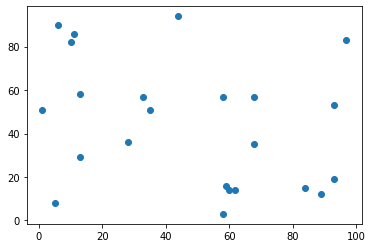

In [520]:
#5
df_3 = pd.read_csv("./61050272.csv")
df_3 = df_3.to_numpy()
df_x = df_3[ : ,  :1]
df_y = df_3[ : , 1: ]
plt.scatter(df_x, df_y)
plt.show

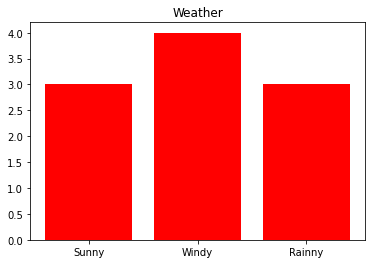

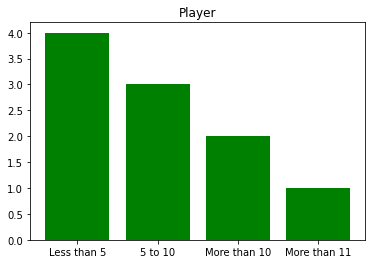

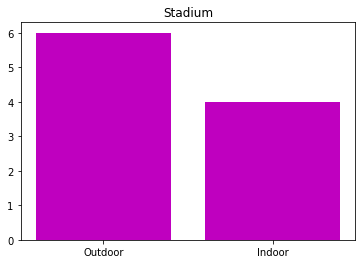

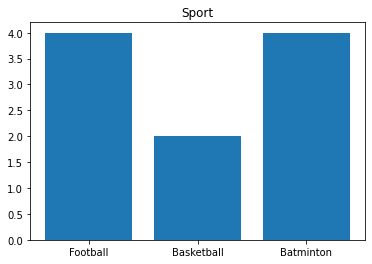

In [521]:
#6
sum2 = sum%5
if sum2 % 2 == 0:
  #Pie Chart
  data1 = [3, 2, 1, 2, 2]
  label1 = ["36.5", "37", "37.5", "38", "39"] 
  data2 = [4, 6]
  label2 = ["Yes", "No"]
  data3 = [3, 7]
  label3 = ["Yes", "No"]
  data4 = [3, 4, 3]
  label4 = ["Normal", "Cold", "Dengue Fever"]

  plt.figure(0)
  plt.title("Body Temperature (C)")
  plt.pie(data1, labels = label1, autopct = "%.1f%%")

  plt.figure(1)
  plt.title("Cough")
  plt.pie(data2, labels = label2, autopct = "%.1f%%")

  plt.figure(2)
  plt.title("Runny Nose")
  plt.pie(data3, labels = label3, autopct = "%.1f%%")

  plt.figure(3)
  plt.title("Disease")
  plt.pie(data4, labels = label4, autopct = "%.1f%%")

  plt.show
  
else:
  #Bar Chart
  data1 = ["Sunny", "Windy", "Rainny"]
  height1 = [3, 4, 3]
  data2 = ["Less than 5", "5 to 10", "More than 10", "More than 11"]
  height2 = [4, 3, 2, 1]
  data3 = ["Outdoor", "Indoor"]
  height3 = [6, 4]
  data4 = ["Football", "Basketball", "Batminton"]
  height4 = [4, 2, 4]

  plt.figure(0)
  plt.title("Weather")
  plt.bar(data1,height1, color='r')

  plt.figure(1)
  plt.title("Player")
  plt.bar(data2, height2, color='g')

  plt.figure(2)
  plt.title("Stadium")
  plt.bar(data3, height3, color='m')

  plt.figure(3)
  plt.title("Sport")
  plt.bar(data4, height4)

  plt.show


<function matplotlib.pyplot.show>

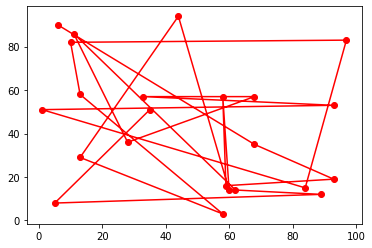

In [522]:
#7
plt.plot(df_x, df_y, color = 'r', marker = "o")
plt.show

In [523]:
#8
sum2 = sum%5
x = df_x #Train
y = df_y #Validation
a = 0
for i in id[ :4]:
  a += int(i)

b = 0
for i in id[5: ]:
  b += int(i)

if sum2 == 0 or sum2 == 1:
  #Linear Regression
  lr = LinearRegression()
  lr.fit(x, y)
  lr.predict([[a]])
  lr.predict([[b]])
  print("R2 = ", lr.score(x, y))

elif sum2 == 2 or sum2 == 3:
  #Decision Tree Regression
  dtr = DecisionTreeRegressor(criterion = 'mae')
  dtr.fit(x, y)
  dtr.predict([[a]])
  dtr.predict([[b]])
  print("R2 = ", dtr.score(x, y))

else:
  #KNNRegression (K = 2)
  knr = KNeighborsRegressor(n_neighbors = 2)
  knr.fit(x, y)
  knr.predict([[a]])
  knr.predict([[b]])
  print("R2 = ", knr.score(x, y))

R2 =  0.8552711967167242


In [524]:
#9
df_4 = df_2
if CD == "S":
  #Sunny = 0, Windy = 1, Rainny = 2
  rename_dict={"Sunny" : 0, "Windy" : 1, "Rainny" : 2}
  df_4['Weather'].replace(rename_dict, inplace=True)
  #Less than 5 = 0, 5 to 10 = 1, More than 10 = 2, More than 11 = 3
  rename_dict={"Less than 5" : 0, "5 to 10" : 1, "More than 10" : 2, "More than 11" : 3}
  df_4['Player'].replace(rename_dict, inplace=True)
  #Outdoor = 0, Indoor = 1
  rename_dict={"Outdoor" : 0, "Indoor" : 1}
  df_4['Stadium'].replace(rename_dict, inplace=True)
  #Football = 0, Bassketball = 1, Batminton = 2
  rename_dict={"Football" : 0, "Basketball" : 1, "Batminton" : 2}
  df_4['Sport'].replace(rename_dict, inplace=True)
  prob = [0, 1, 1]
  
else:
  #Replace Temperature with numbers from 0-4 in Body Temperature (C) columbs
  rename_dict={36.5 : 0, 37.0 : 1, 37.5 : 2, 38.0 : 3, 39.0 : 4}
  df_4['Body Temperature (C)'].replace(rename_dict, inplace=True)
  #Yes = 1, No = 0
  rename_dict={"Yes" : 1, "No" : 0}
  df_4['Cough'].replace(rename_dict, inplace=True)
  df_4['Runny Nose'].replace(rename_dict, inplace=True)
  #Normal = 0, Cold = 1, Dengue Fever = 2
  rename_dict={"Normal" : 0, "Cold" : 1, "Dengue Fever" : 2}
  df_4['Disease'].replace(rename_dict, inplace=True)
  prob = [1, 1, 0]

df_4.to_numpy()
x = df_4.iloc[ : , :3]
y = df_4.iloc[ : ,3: ]

sum2 = sum%5
if sum2 == 0:
  #Decision Tree Classification
  dtc = DecisionTreeClassifier(criterion = 'entropy')
  dtc.fit(x, y)
  dtc.predict([[2, 2, 2]])
  print(dtc.predict_proba([prob]))

elif sum2 == 1:
  #Naïve Bayes Classification
  gnb = GaussianNB()
  gnb.fit(x, y)
  gnb.predict([[2, 2, 2]])
  print(gnb.predict_proba([prob]))

elif sum2 == 2:
  #KNN Classification (K = 2)
  knc = KNeighborsClassifier(n_neighbors = 1)
  knc.fit(x, y)
  knc.predict([[2, 2, 2]])
  print(knc.predict_proba([prob]))

elif sum2 == 3:
  #Random Forest Classification (criterion = “gini”)
  rfc = RandomForestClassifier(criterion = 'gini')
  rfc.fit(x, y)
  rfc.predict([[2, 2, 2]])
  print(rfc.predict_proba([prob]))

elif sum2 == 4:
  #Random Forest Classification (criterion = “entropy”)
  rfc = RandomForestClassifier(criterion = 'entropy')
  rfc.fit(x, y)
  rfc.predict([[2, 2, 2]])
  print(rfc.predict_proba([prob]))

[[0.7  0.17 0.13]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [525]:
#10
x = df_3
#a,b from 8
if sum2 == 0:
  #Hierarchical Clustering - Cluster = 4
  hcc = AgglomerativeClustering(n_clusters=4)
  hcc.fit(x)
  hcc.labels_
  hcc.fit_predict([[a, b]])

elif sum2 == 1:
  #Hierarchical Clustering - Cluster = 5
  hcc = AgglomerativeClustering(n_clusters=5)
  hcc.fit(x)
  hcc.labels_
  hcc.fit_predict([[a, b]])

elif sum2 == 2:
  #KMean Clustering - Cluster = 5
  kmc = KMeans(n_clusters = 5)
  kmc.fit(x)
  kmc.labels_
  print(kmc.predict([[a, b]]))

elif sum2 == 3:
  #KMean Clustering - Cluster = 4
  kmc = KMeans(n_clusters = 4)
  kmc.fit(x)
  kmc.labels_
  print(kmc.predict([[a, b]]))

elif sum2 == 4:
  #DBSCAN - eps = 10, min_sample = 2
  dbc = DBSCAN(eps = 10, min_samples = 2)
  dbc.fit(x)
  dbc.labels_
  print(dbc.fit_predict([[a, b]]))

[1]
